# Data Preparation for Admission Prediction Dataset

## Objective
Prepare the `Admission_Predict_Ver1.1.csv` dataset to predict a student's chance of admission. We will analyze the correlation matrix to identify the target variable, expecting features like `GRE Score`, `CGPA`, and `University Rating` to have moderate correlations (0.2–0.4) with the target. Additionally, we will apply K-Means clustering to identify patterns, build a recommendation system, and use xAI to interpret the clusters.

## Dataset
The dataset includes features such as `GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `LOR`, `CGPA`, and `Research`, with `Chance of Admit` as the target variable (a continuous value between 0 and 1 representing admission probability).

## Step 1: Import Libraries
Import necessary libraries for data manipulation, visualization, preprocessing, modeling, clustering, recommendation, and xAI analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import shap
from IPython.display import Image
%matplotlib inline

## Step 2: Load and Explore the Dataset
Load the dataset and display its structure, summary statistics, and missing values.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None

First 5 rows of the dataset:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104

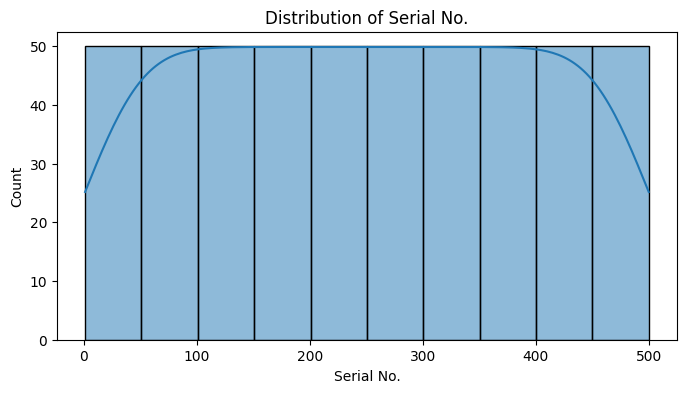

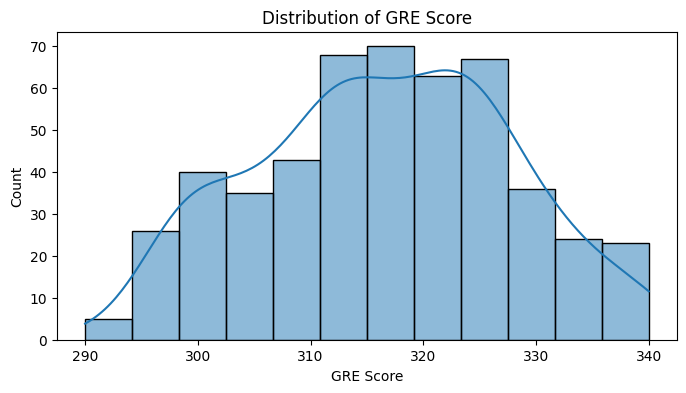

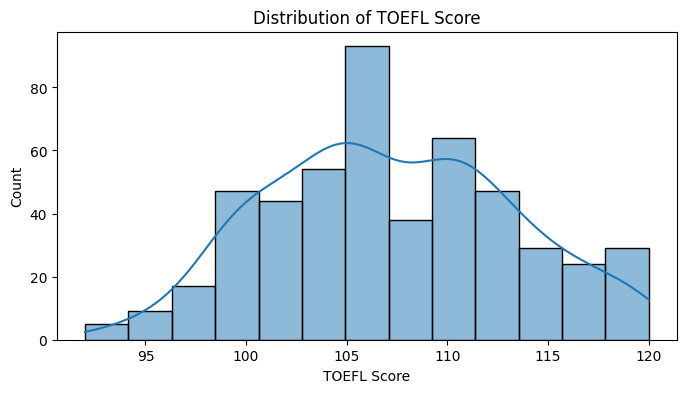

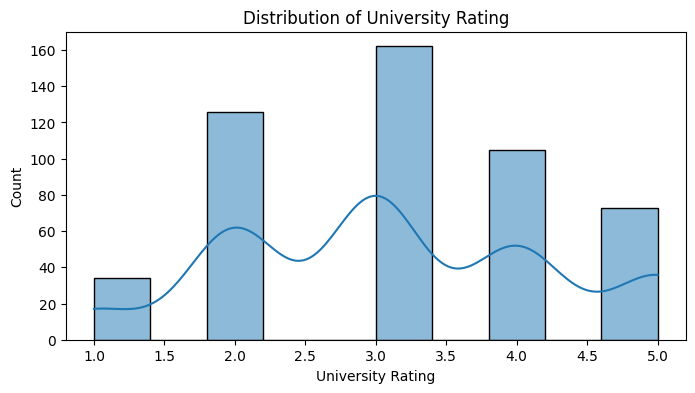

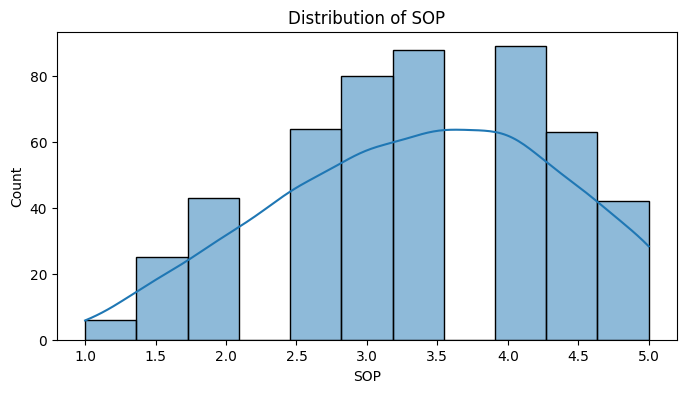

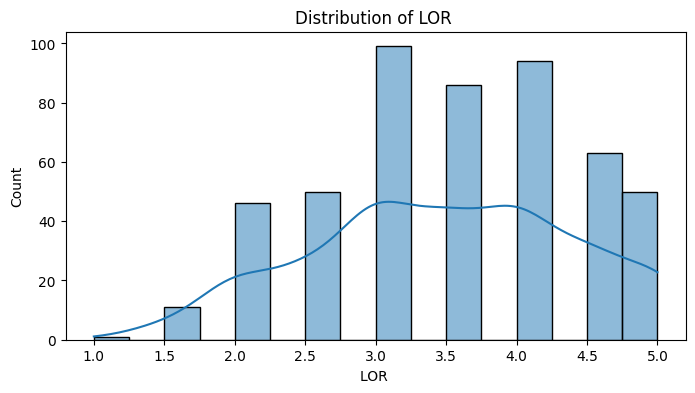

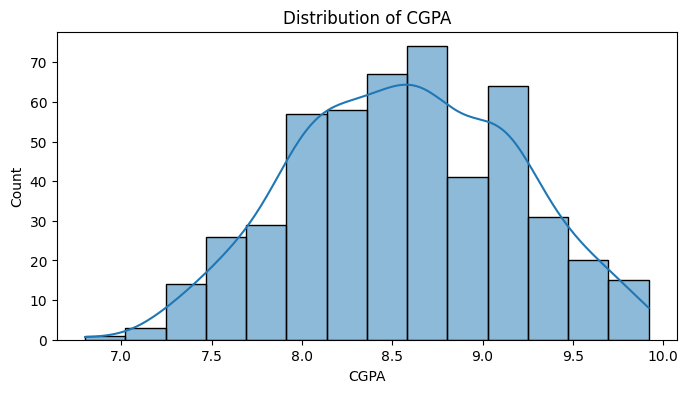

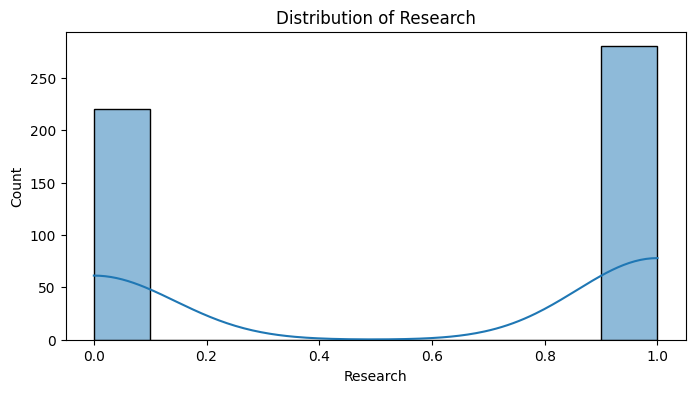

In [ ]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'Chance of Admit ']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Step 3: Preprocess the Data
Handle missing values and normalize numerical features (excluding the target).

In [ ]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_normalized = df.copy()
print("\nFirst 5 rows of normalized dataset:")
print(df_normalized.head())


Missing values after imputation:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

First 5 rows of normalized dataset:
   Serial No.  GRE Score  TOEFL Score  University Rating       SOP      LOR   \
0   -1.728590   1.819238     1.778865           0.775582  1.137360  1.098944   
1   -1.721662   0.667148    -0.031601           0.775582  0.632315  1.098944   
2   -1.714734  -0.041830    -0.525364          -0.099793 -0.377773  0.017306   
3   -1.707806   0.489904     0.462163          -0.099793  0.127271 -1.064332   
4   -1.700877  -0.219074    -0.689952          -0.975168 -1.387862 -0.523513   

       CGPA  Research  Chance of Admit   
0  1.776806  0.886405              0.92  
1  0.485859  0.886405              0.76  
2 -0.954043  0.886405              0.72  
3  0.154847  0.886405              0.80  
4 -0.606480 -1.128

<ipython-input-3-05190ec4f6f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


## Step 4: Analyze Correlation Matrix to Identify Target
Compute and visualize the correlation matrix. Expect features like `GRE Score` and `CGPA` to have moderate correlations (0.2–0.4) with `Chance of Admit`.

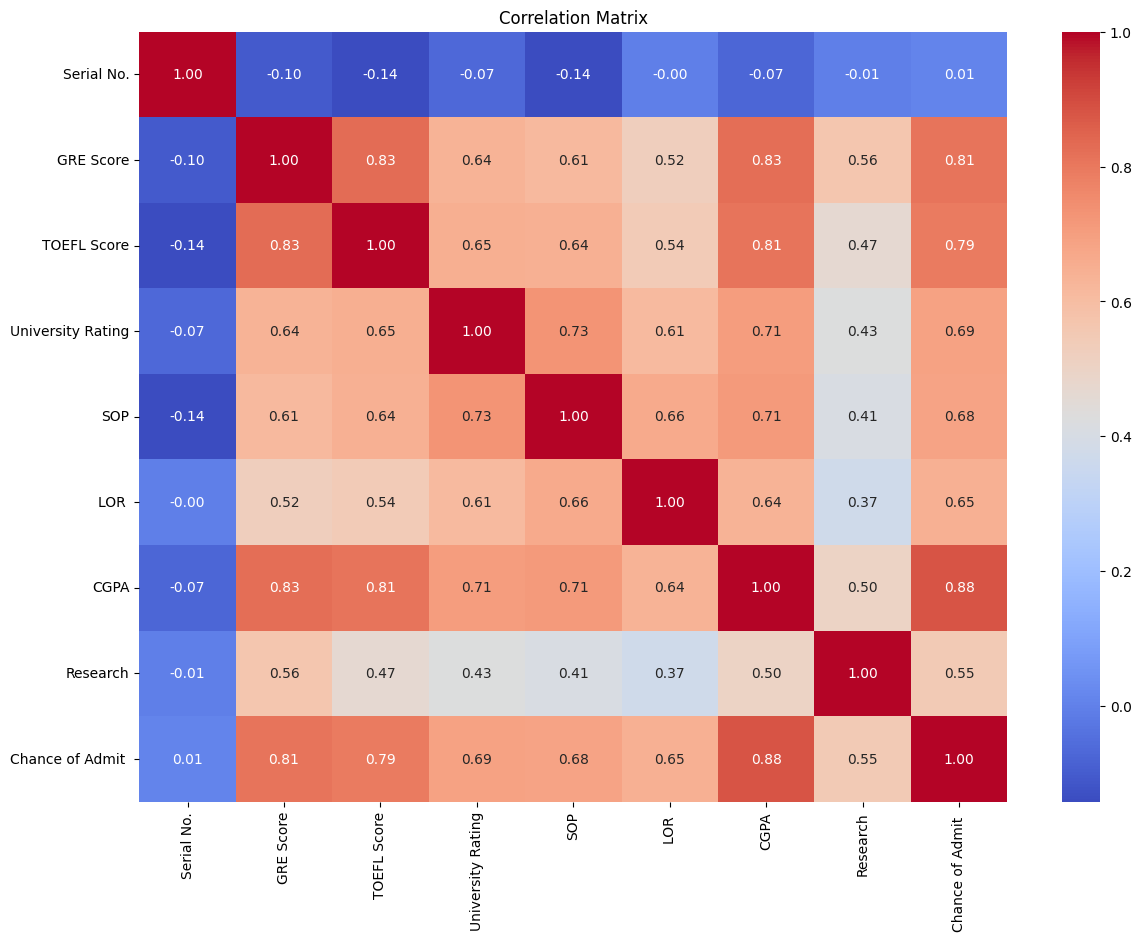


Correlation Matrix:
                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.103839    -0.141696          -0.067641   
GRE Score           -0.103839   1.000000     0.827200           0.635376   
TOEFL Score         -0.141696   0.827200     1.000000           0.649799   
University Rating   -0.067641   0.635376     0.649799           1.000000   
SOP                 -0.137352   0.613498     0.644410           0.728024   
LOR                 -0.003694   0.524679     0.541563           0.608651   
CGPA                -0.074289   0.825878     0.810574           0.705254   
Research            -0.005332   0.563398     0.467012           0.427047   
Chance of Admit      0.008505   0.810351     0.792228           0.690132   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.137352 -0.003694 -0.074289 -0.005332          0.008505  
GRE Score          0.613498  0.524679  0.825878  0.563398     

In [ ]:
corr_matrix = df_normalized.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("\nCorrelation Matrix:")
print(corr_matrix)

print("\nAnalysis of Potential Target Variables:")
for col in corr_matrix.columns:
    avg_corr = corr_matrix[col].drop(col).abs().mean()
    print(f"{col}: Average absolute correlation with other features = {avg_corr:.3f}")

print("\nRecommendation:")
print("'Chance of Admit ' should be the target variable, as it represents the admission probability. Confirm it has moderate correlations (0.2–0.4) with features like GRE Score, CGPA, etc.")
print("Update the 'target' variable in the next cell if analysis suggests otherwise.")

## Step 5: Select Features Based on Chosen Target
Set the target variable and select features with an absolute correlation above 0.1.

In [ ]:
target = 'Chance of Admit '

if target in df_normalized.columns:
    print(f"\nCorrelations with the target '{target}' (absolute values):")
    print(corr_matrix[target].abs())

    correlation_threshold = 0.1
    target_corr = corr_matrix[target].abs()
    selected_features = target_corr[target_corr > correlation_threshold].index.tolist()

    if target in selected_features:
        selected_features.remove(target)

    print(f"\nSelected features correlated with '{target}' (|corr| > {correlation_threshold}): {selected_features}")
else:
    print(f"\nError: The target '{target}' is not in the dataset. Please choose a valid column name.")
    exit()


Correlations with the target 'Chance of Admit ' (absolute values):
Serial No.           0.008505
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

Selected features correlated with 'Chance of Admit ' (|corr| > 0.1): ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']


## Step 6: Create DataFrame with Selected Features
Create a new DataFrame with the selected features and save it to a CSV file.

In [ ]:
df_selected = df_normalized[selected_features]
print("\nFirst 5 rows of DataFrame with selected features:")
print(df_selected.head())

df_selected.to_csv("admission_selected_features.csv", index=False)
print("\nSelected features saved to 'admission_selected_features.csv'")


First 5 rows of DataFrame with selected features:
   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.819238     1.778865           0.775582  1.137360  1.098944  1.776806   
1   0.667148    -0.031601           0.775582  0.632315  1.098944  0.485859   
2  -0.041830    -0.525364          -0.099793 -0.377773  0.017306 -0.954043   
3   0.489904     0.462163          -0.099793  0.127271 -1.064332  0.154847   
4  -0.219074    -0.689952          -0.975168 -1.387862 -0.523513 -0.606480   

   Research  
0  0.886405  
1  0.886405  
2  0.886405  
3  0.886405  
4 -1.128152  

Selected features saved to 'admission_selected_features.csv'


## Step 7: Split the Data
Split the dataset into training and testing sets for supervised learning. Since `Chance of Admit` is continuous, we’ll binarize it (e.g., >0.5 = 1, <=0.5 = 0) for classification.

In [ ]:
X = df_selected
y = (df_normalized['Chance of Admit '] > 0.5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

Data split into training and testing sets.


## Step 8: Implement K-Nearest Neighbors (KNN)
Use the elbow method to find the optimal number of neighbors, train the KNN model, and evaluate its accuracy.

In [ ]:
accuracies = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('Elbow Method for Optimal k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('knn_elbow_plot.png')
plt.close()

optimal_k = accuracies.index(max(accuracies)) + 1
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Optimal k for KNN: {optimal_k}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title('Confusion Matrix for KNN')
plt.savefig('knn_confusion_matrix.png')
plt.close()

Optimal k for KNN: 5
KNN Accuracy: 0.9500


## Step 8.1: Display KNN Visualizations
Display the elbow plot and confusion matrix for the KNN model.

Confusion Matrix for KNN:


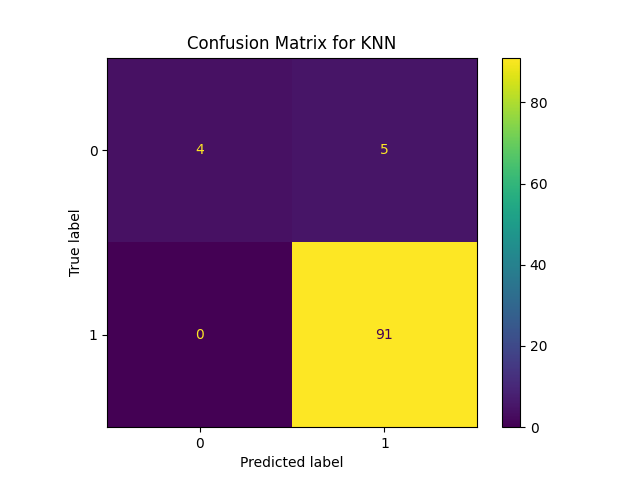

In [ ]:
#print("Elbow Plot for KNN:")
#display(Image(filename='knn_elbow_plot.png'))

print("Confusion Matrix for KNN:")
display(Image(filename='knn_confusion_matrix.png'))

## Step 9: Implement Support Vector Machine (SVM)
Train the SVM model with a linear kernel and evaluate its accuracy.

In [ ]:
svm = SVC(kernel='linear', random_state=42, probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('Confusion Matrix for SVM')
plt.savefig('svm_confusion_matrix.png')
plt.close()

SVM Accuracy: 0.9300


## Step 9.1: Display SVM Visualizations
Display the confusion matrix for the SVM model.

Confusion Matrix for SVM:


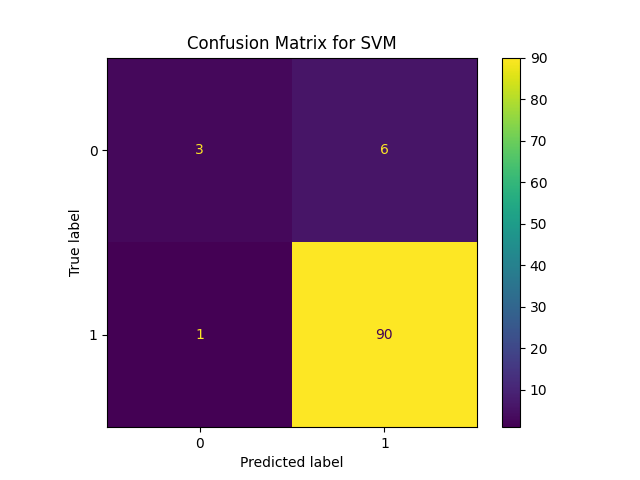

In [ ]:
print("Confusion Matrix for SVM:")
display(Image(filename='svm_confusion_matrix.png'))

## Step 10: Implement Decision Tree
Train a Decision Tree model, evaluate its accuracy, and visualize the tree structure and confusion matrix.

In [ ]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.savefig('dt_confusion_matrix.png')
plt.close()

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=selected_features, class_names=['Not Admitted', 'Admitted'], filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.savefig('decision_tree_plot.png', dpi=300)
plt.close()

Decision Tree Accuracy: 0.9300


## Step 10.1: Display Decision Tree Visualizations
Display the confusion matrix and decision tree plot for the Decision Tree model.

Confusion Matrix for Decision Tree:


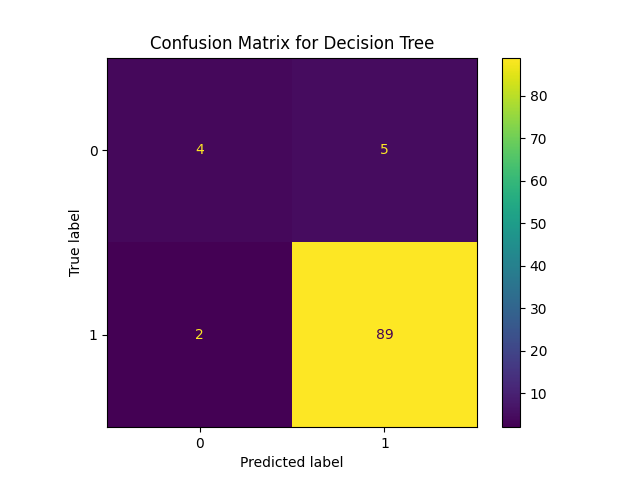

Decision Tree Structure:


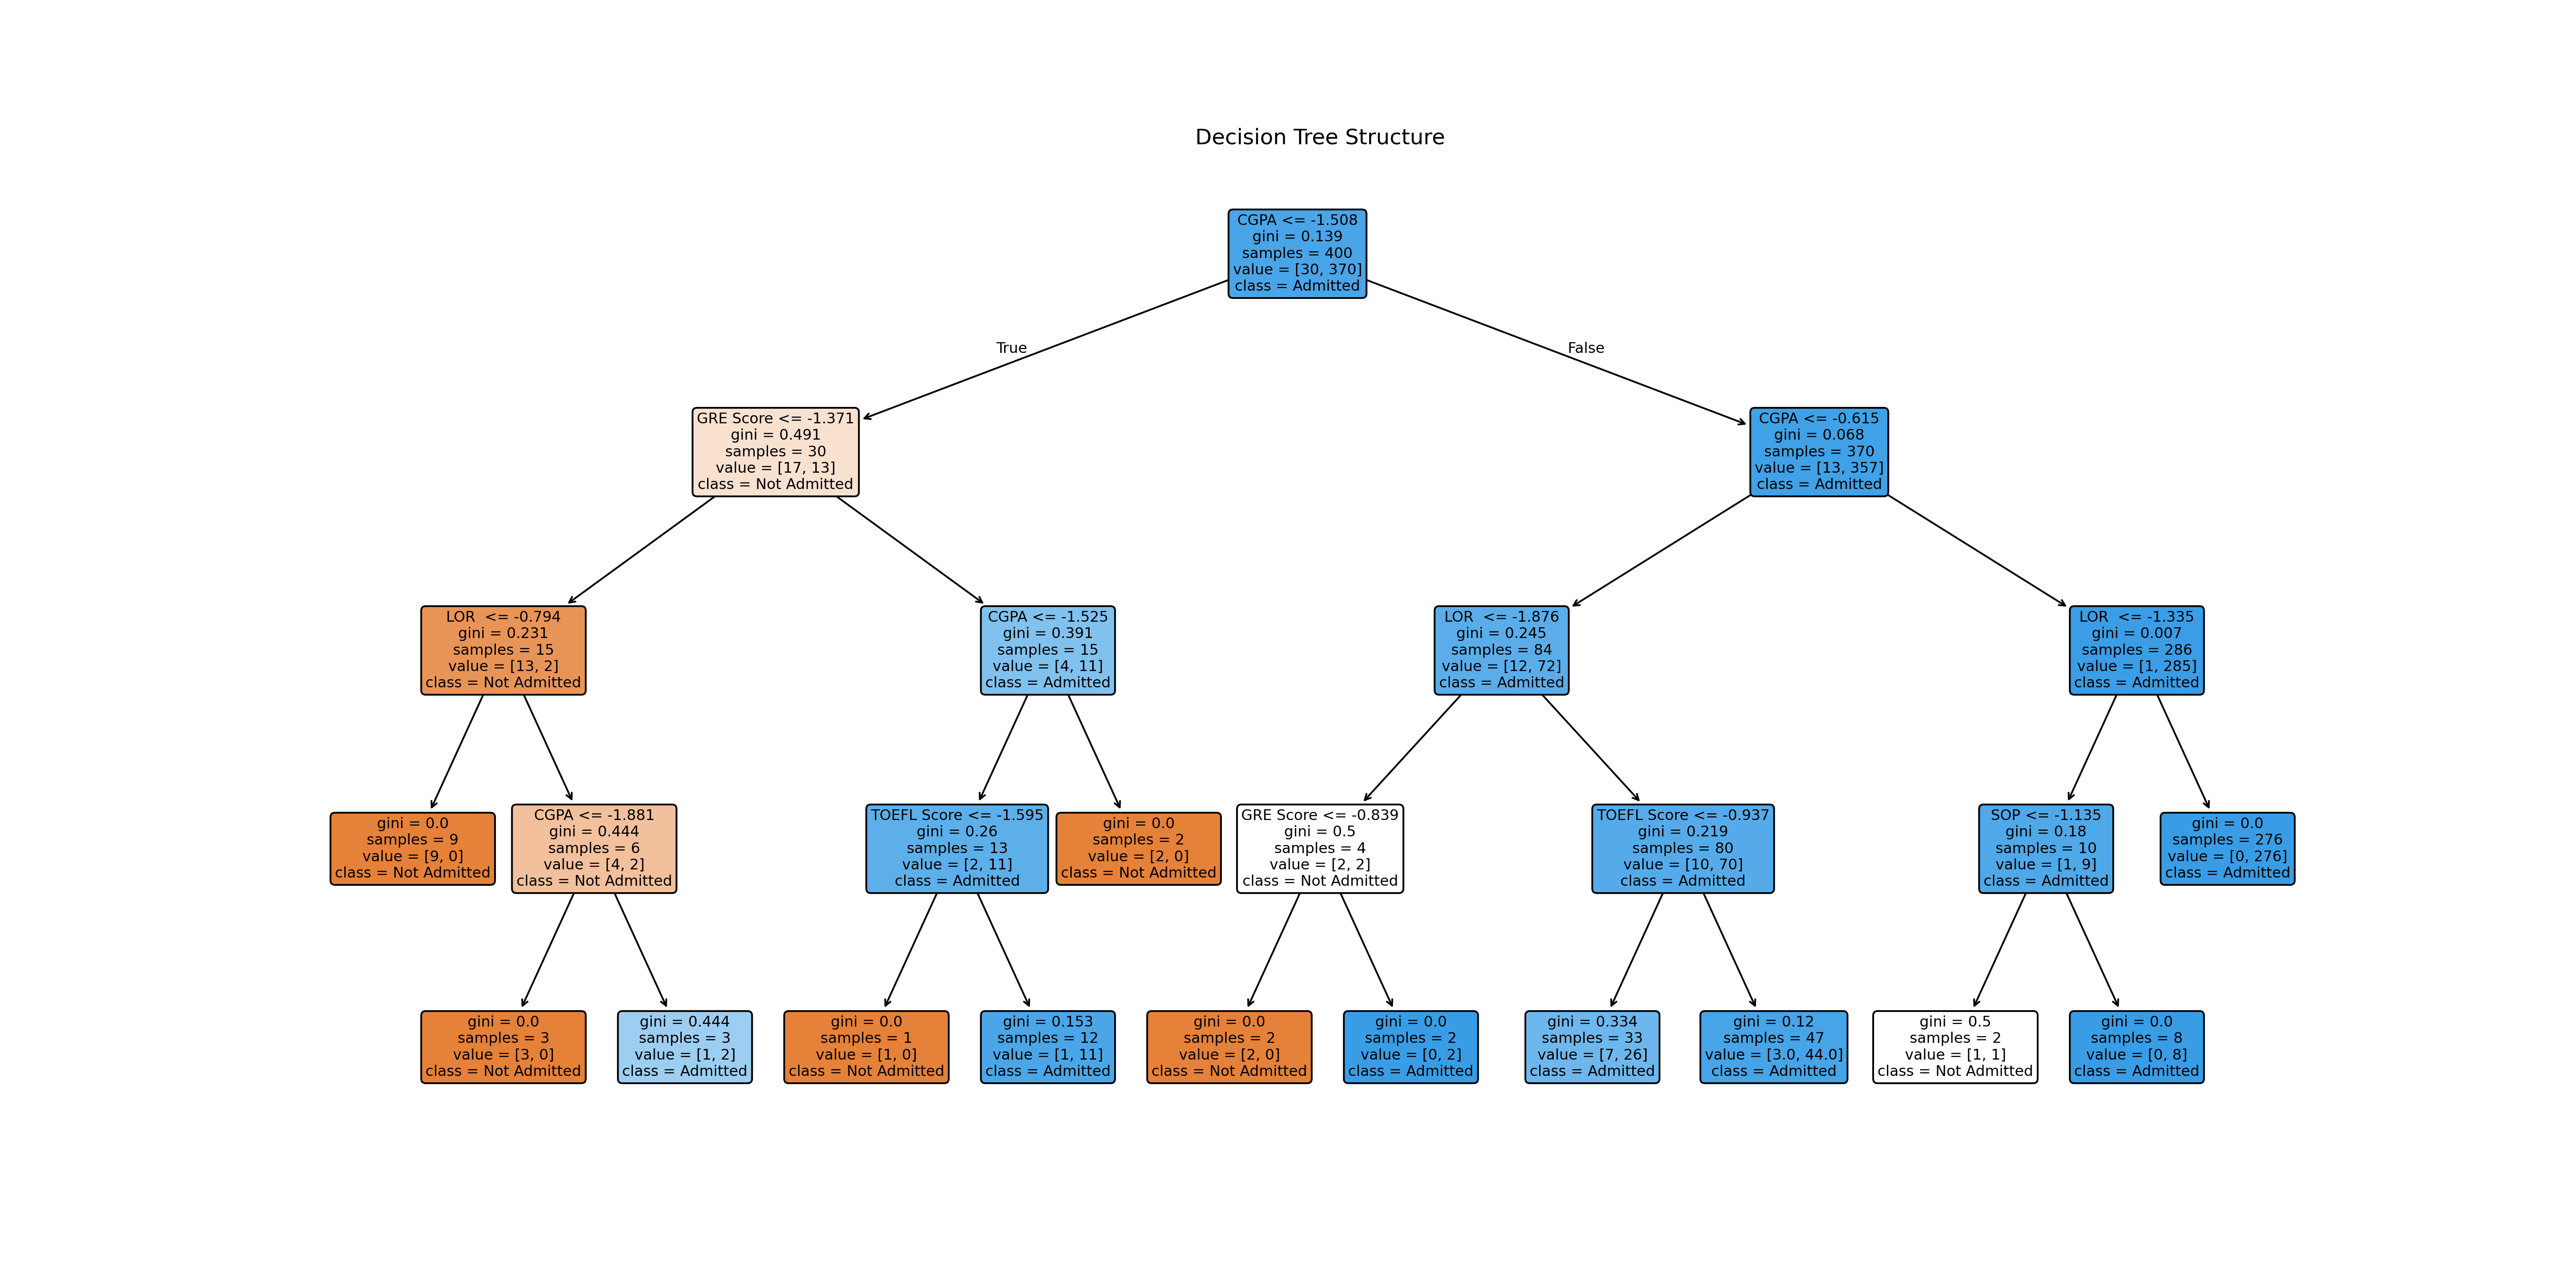

In [ ]:
print("Confusion Matrix for Decision Tree:")
display(Image(filename='dt_confusion_matrix.png'))

print("Decision Tree Structure:")
display(Image(filename='decision_tree_plot.png'))

## Step 11: Implement XGBoost
Train an XGBoost model and evaluate its accuracy with a confusion matrix.

In [ ]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title('Confusion Matrix for XGBoost')
plt.savefig('xgb_confusion_matrix.png')
plt.close()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:29:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9200


## Step 11.1: Display XGBoost Visualizations
Display the confusion matrix for the XGBoost model.

Confusion Matrix for XGBoost:


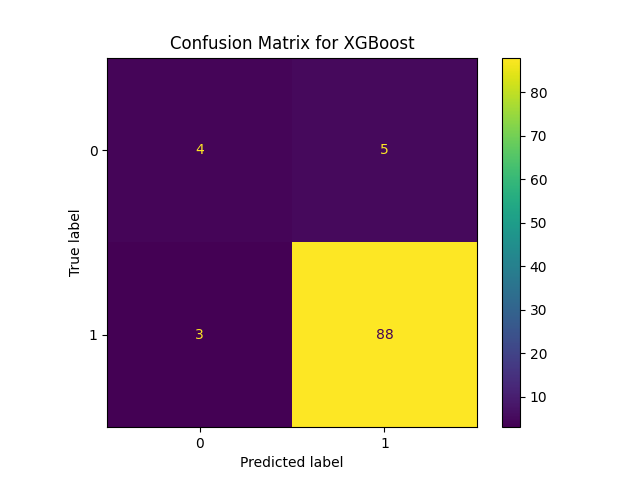

In [ ]:
print("Confusion Matrix for XGBoost:")
display(Image(filename='xgb_confusion_matrix.png'))

## Step 12: Compare Models
Compare the accuracies of KNN, SVM, Decision Tree, and XGBoost models.

In [ ]:
print("\nModel Comparison:")
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

accuracies = {'KNN': accuracy_knn, 'SVM': accuracy_svm, 'Decision Tree': accuracy_dt, 'XGBoost': accuracy_xgb}
best_model = max(accuracies, key=accuracies.get)
print(f"{best_model} performs the best with an accuracy of {accuracies[best_model]:.4f}.")

if best_model == 'KNN':
    best_classifier = knn
elif best_model == 'SVM':
    best_classifier = svm
elif best_model == 'Decision Tree':
    best_classifier = dt
else:
    best_classifier = xgb

print(f"Using {best_model} for recommendation predictions.")


Model Comparison:
KNN Accuracy: 0.9500
SVM Accuracy: 0.9300
Decision Tree Accuracy: 0.9300
XGBoost Accuracy: 0.9200
KNN performs the best with an accuracy of 0.9500.
Using KNN for recommendation predictions.


## Step 13: Implement K-Means Clustering
Apply K-Means clustering to identify patterns in the dataset. Use the elbow method to determine the optimal number of clusters, then visualize the clusters using PCA with improved color separation and larger representation.

In [ ]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
    kmeans.fit(df_selected)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig('kmeans_elbow_plot.png')
plt.close()

optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=12, random_state=42)
cluster_labels = kmeans.fit_predict(df_selected)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_selected)

plt.figure(figsize=(12, 8))
colors = plt.cm.tab10(np.linspace(0, 1, optimal_k))

for cluster in range(optimal_k):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1],
                s=100, alpha=0.6, color=colors[cluster], label=f'Cluster {cluster}')

centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=300, linewidths=3, color='black', label='Centroids')

plt.title('K-Means Clustering (PCA-reduced Data)', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='best')
plt.savefig('kmeans_clusters.png', dpi=300)
plt.close()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


## Step 13.1: Display K-Means Visualizations
Display the elbow plot and the improved cluster visualization for K-Means.

Elbow Plot for K-Means:


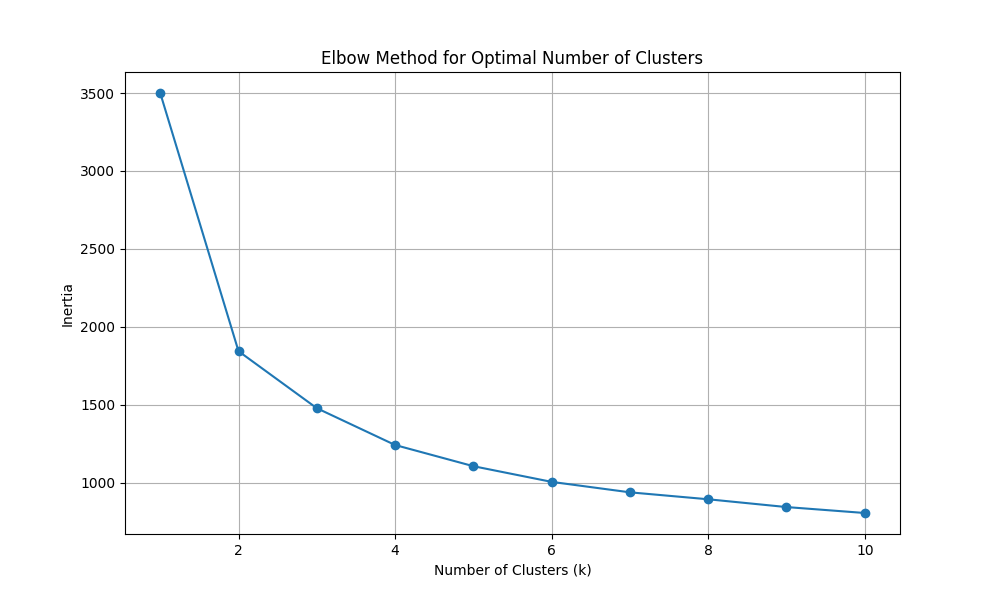

K-Means Clusters (PCA-reduced Data):


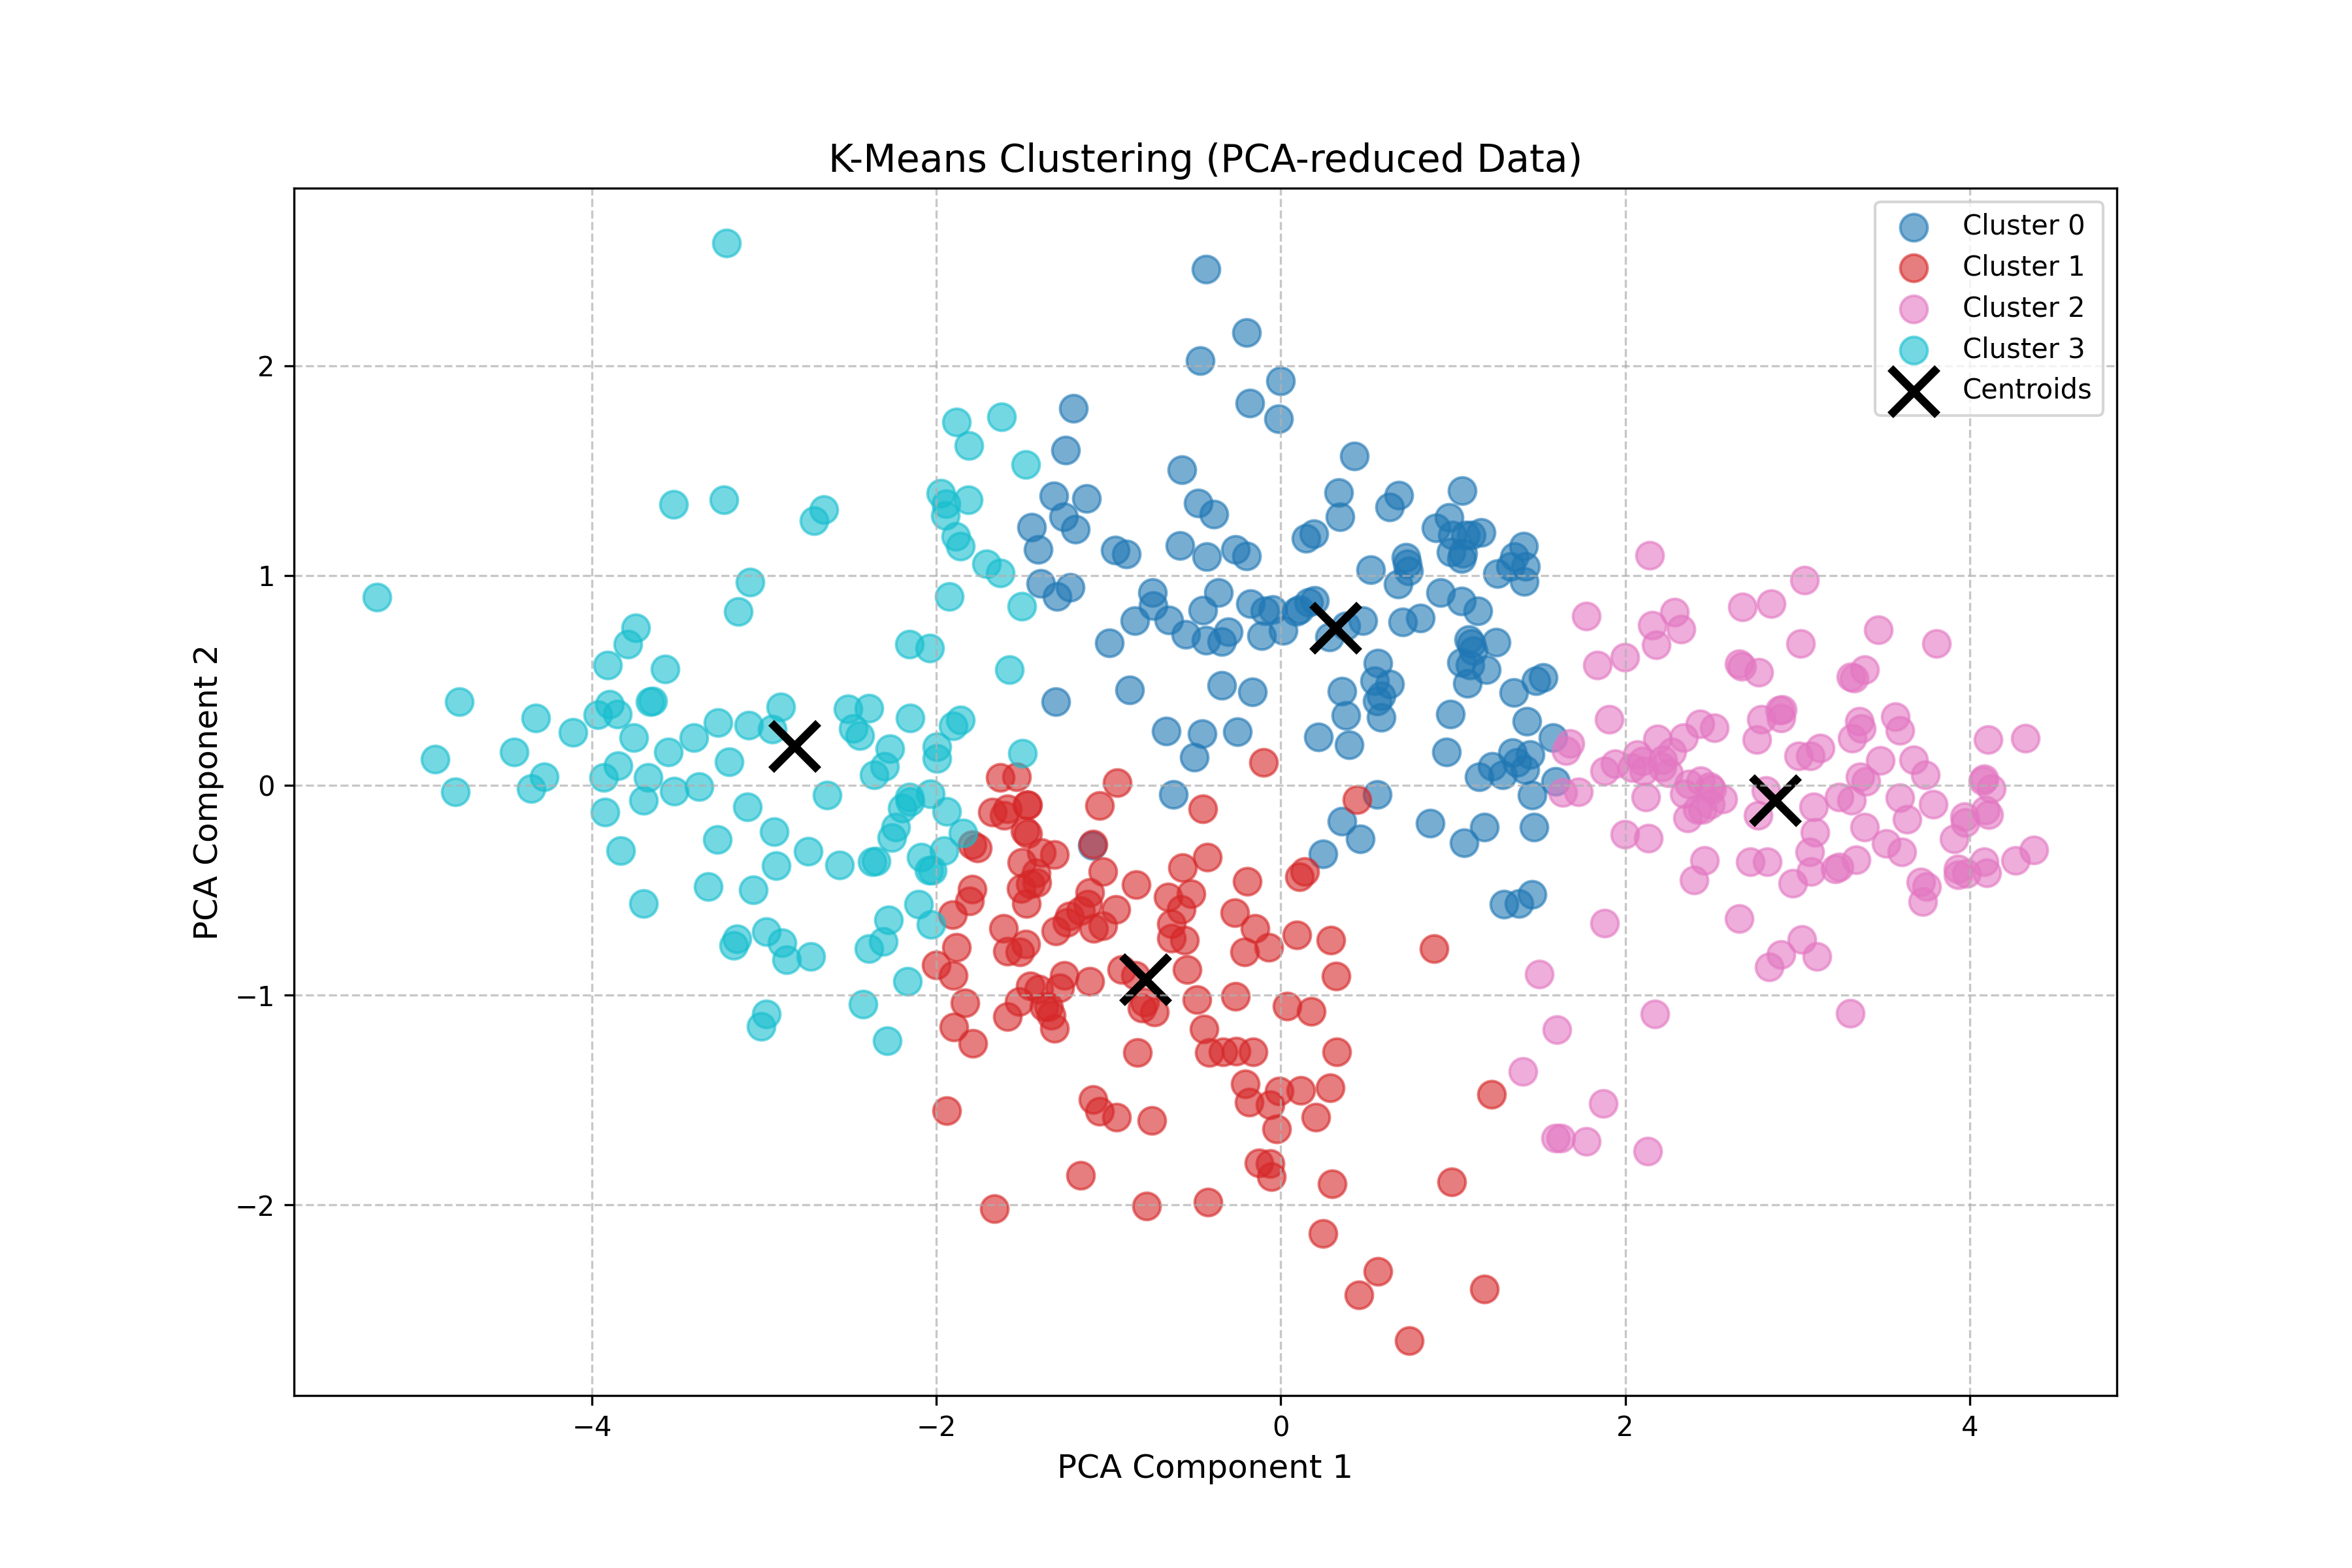

In [ ]:
print("Elbow Plot for K-Means:")
display(Image(filename='kmeans_elbow_plot.png'))

print("K-Means Clusters (PCA-reduced Data):")
display(Image(filename='kmeans_clusters.png'))

## Step 13.2: Interpret K-Means Clusters with xAI
Analyze the clusters using SHAP (xAI) to understand the contribution of each feature to the cluster assignments, and provide a detailed interpretation.


Cluster Summary (Mean Values):
         GRE Score  TOEFL Score  University Rating       SOP      LOR   \
Cluster                                                                  
0         0.189106     0.056099          -0.067845 -0.012814 -0.034012   
1        -0.408469    -0.282465          -0.170387 -0.031573 -0.013224   
2         1.155955     1.173234           1.172236  1.086066  0.967965   
3        -1.110087    -1.106612          -1.077689 -1.201314 -1.059460   

             CGPA  Research  
Cluster                      
0        0.013986  0.886405  
1       -0.235960 -1.128152  
2        1.230249  0.729018  
3       -1.172332 -0.674423  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X d

SHAP Feature Importance (Bar Plot):


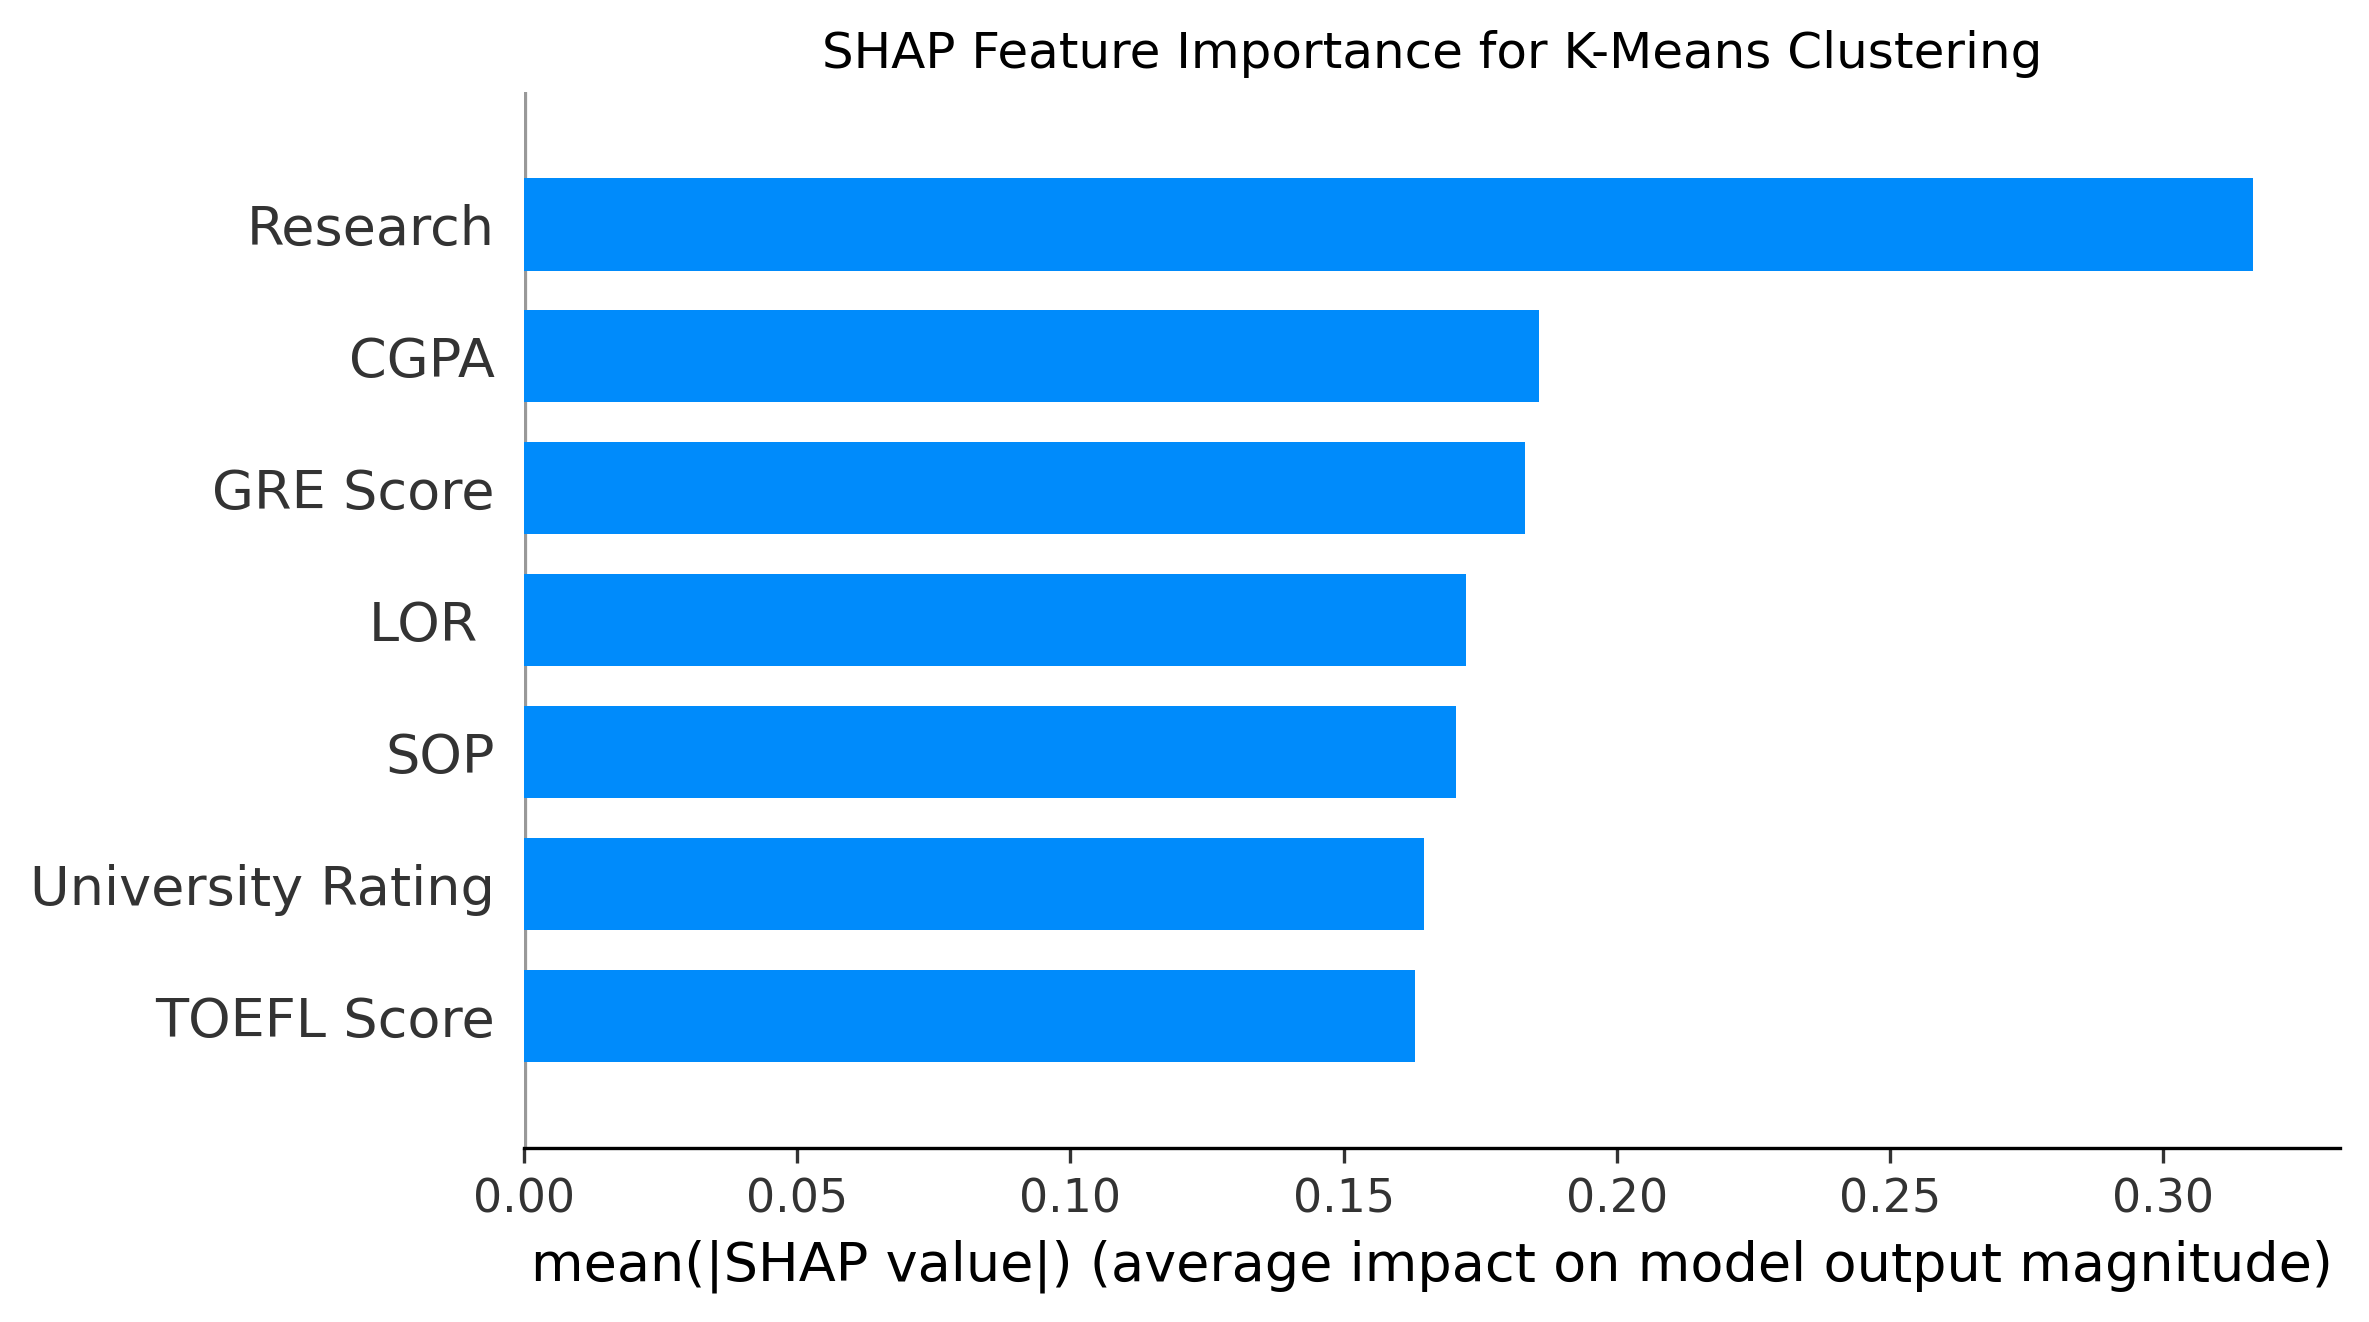

SHAP Summary Plot (Dot Plot):


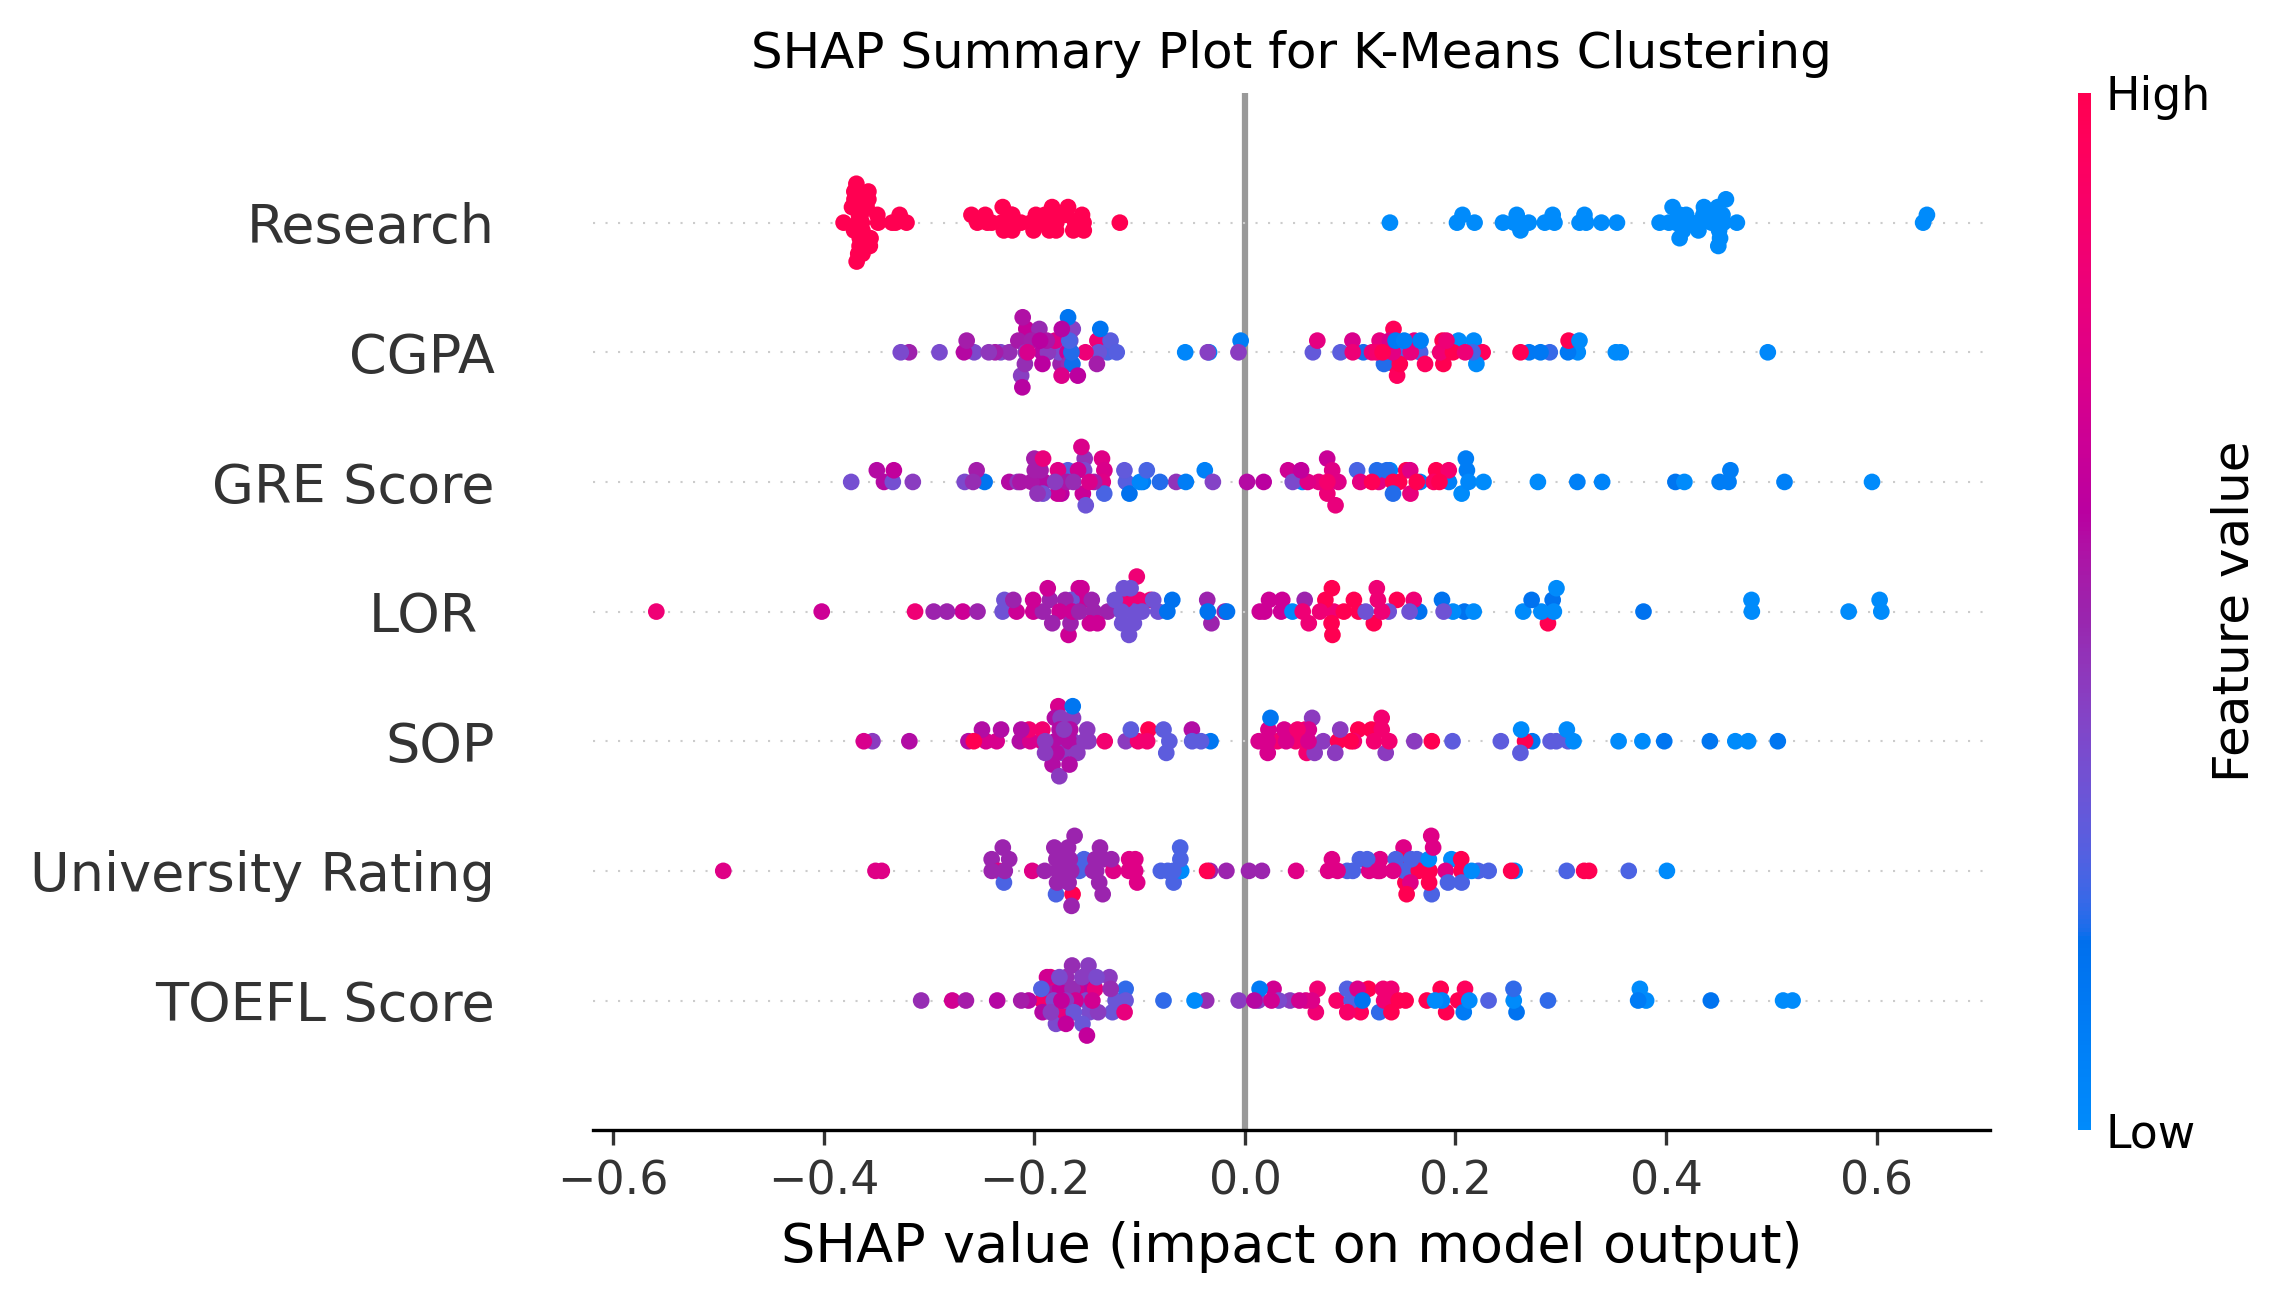


Enhanced Interpretation with xAI (SHAP):
The clusters represent groups of students with similar academic profiles based on the selected features. Using SHAP, we can identify the most influential features driving the cluster assignments:
- Top 3 influential features for clustering: GRE Score, TOEFL Score, University Rating.

Cluster 0:
- Highest mean feature: Research (value: 0.89)
- Lowest mean feature: University Rating (value: -0.07)
- Most influential feature for this cluster (via SHAP): GRE Score (SHAP value: 0.18)
- Likely represents students with lower academic profiles, possibly lower GRE scores or CGPA.

Cluster 1:
- Highest mean feature: LOR  (value: -0.01)
- Lowest mean feature: Research (value: -1.13)
- Most influential feature for this cluster (via SHAP): GRE Score (SHAP value: 0.16)
- Likely represents students with average academic performance.

Cluster 2:
- Highest mean feature: CGPA (value: 1.23)
- Lowest mean feature: Research (value: 0.73)
- Most influential feature 

<ipython-input-19-04dcc621ab06>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"- Most influential feature for this cluster (via SHAP): {top_cluster_feature} (SHAP value: {cluster_shap_df['Mean SHAP Value'][0]:.2f})")
<ipython-input-19-04dcc621ab06>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"- Most influential feature for this cluster (via SHAP): {top_cluster_feature} (SHAP value: {cluster_shap_df['Mean SHAP Value'][0]:.2f})")
<ipython-input-19-04dcc621ab06>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

In [ ]:
df_normalized['Cluster'] = cluster_labels

cluster_summary = df_normalized.groupby('Cluster')[selected_features].mean()
print("\nCluster Summary (Mean Values):")
print(cluster_summary)

# Define a function to predict cluster labels for SHAP
def kmeans_predict(X):
    return kmeans.predict(X)

# Sample a subset of the data to speed up SHAP computation
X_sample = df_selected.sample(n=min(100, len(df_selected)), random_state=42)

# Initialize the SHAP explainer
explainer = shap.KernelExplainer(kmeans_predict, X_sample)

# Compute SHAP values (multi-output for each cluster)
shap_values = explainer.shap_values(X_sample)

# Aggregate SHAP values across all clusters
mean_shap_values = np.mean([np.abs(sv).mean(axis=0) for sv in shap_values], axis=0)

# Create DataFrame with mean SHAP values per feature
shap_df = pd.DataFrame(mean_shap_values, index=selected_features, columns=['Mean SHAP Value']).T

# Generate SHAP summary plot (Bar Plot)
plt.figure()
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance for K-Means Clustering')
plt.savefig('shap_summary_bar.png', dpi=300, bbox_inches='tight')
plt.close()

# Generate SHAP summary plot (Dot Plot)
plt.figure()
shap.summary_plot(shap_values, X_sample, show=False)
plt.title('SHAP Summary Plot for K-Means Clustering')
plt.savefig('shap_summary_dot.png', dpi=300, bbox_inches='tight')
plt.close()

# Display SHAP plots
print("SHAP Feature Importance (Bar Plot):")
display(Image(filename='shap_summary_bar.png'))

print("SHAP Summary Plot (Dot Plot):")
display(Image(filename='shap_summary_dot.png'))

# Enhanced interpretation with SHAP insights
print("\nEnhanced Interpretation with xAI (SHAP):")
print("The clusters represent groups of students with similar academic profiles based on the selected features. Using SHAP, we can identify the most influential features driving the cluster assignments:")

# Summarize SHAP values for interpretation
top_features = shap_df.T.sort_values(by='Mean SHAP Value', ascending=False).head(3).index.tolist()
print(f"- Top 3 influential features for clustering: {', '.join(top_features)}.")

# Detailed interpretation per cluster
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = df_normalized[df_normalized['Cluster'] == cluster][selected_features]
    cluster_means = cluster_summary.loc[cluster]

    # Identify features with highest and lowest means in this cluster
    top_feature = cluster_means.idxmax()
    bottom_feature = cluster_means.idxmin()

    print(f"- Highest mean feature: {top_feature} (value: {cluster_means[top_feature]:.2f})")
    print(f"- Lowest mean feature: {bottom_feature} (value: {cluster_means[bottom_feature]:.2f})")

    # Use SHAP to explain why this cluster is distinct
    cluster_shap = np.abs(shap_values).mean(axis=0)[cluster]
    cluster_shap_df = pd.DataFrame(cluster_shap, index=selected_features, columns=['Mean SHAP Value']).sort_values(by='Mean SHAP Value', ascending=False)
    top_cluster_feature = cluster_shap_df.index[0]
    print(f"- Most influential feature for this cluster (via SHAP): {top_cluster_feature} (SHAP value: {cluster_shap_df['Mean SHAP Value'][0]:.2f})")

    # Provide a summary
    if cluster == 0:
        print("- Likely represents students with lower academic profiles, possibly lower GRE scores or CGPA.")
    elif cluster == 1:
        print("- Likely represents students with average academic performance.")
    elif cluster == 2:
        print("- Likely represents high-performing students with strong GRE scores, CGPA, and research experience.")
    elif cluster == 3:
        print("- Likely represents students with specific strengths, possibly in TOEFL or SOP, but variable overall performance.")

print("\nFurther analysis can be done by examining the SHAP plots and cluster summary to understand how features drive cluster assignments and align with 'Chance of Admit'.")

## Step 14: Build a Recommendation System
Use K-Means clustering to group students and recommend universities based on their cluster. Use the best predictive model to estimate the likelihood of admission.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

university_types = {
    0: "Lower-Tier University (Supportive Admission Policies)",
    1: "Mid-Tier University (Moderate Admission Standards)",
    2: "Top-Tier University (High Academic Requirements)",
    3: "Specialized University (Focus on Specific Strengths)"
}
# Maps clusters to university types based on student profiles.

sample_student = X_test.iloc[[0]]
# Selects the first student from the test set for recommendation.

sample_cluster = kmeans.predict(sample_student)[0]
# Predicts the cluster for the student using K-Means.

recommended_university = university_types[sample_cluster]
# Gets the recommended university type based on the cluster.

# Calibrate the best_classifier to improve probability estimates
calibrated_classifier = CalibratedClassifierCV(best_classifier, method='sigmoid', cv=5)
calibrated_classifier.fit(X_train, y_train)  # Ensure X_train and y_train are defined from earlier steps

admission_prob = calibrated_classifier.predict_proba(sample_student)[:, 1][0] * 100
# Calculates calibrated admission probability (%) for the student.

print(f"\nRecommendation for Sample Student:")
# Prints recommendation header.

print(f"Cluster: {sample_cluster}")
# Shows the student's cluster.

print(f"Recommended University: {recommended_university}")
# Shows the recommended university type.

print(f"Likelihood of Admission: {admission_prob:.2f}%")
# Shows the student's calibrated admission probability.

plt.figure(figsize=(8, 6))
# Creates a figure for plotting (8x6 inches).

bars = plt.bar([recommended_university], [admission_prob], color='skyblue')
# Plots a bar chart with the university and admission probability.

plt.title('Recommended University and Admission Likelihood', fontsize=14)
# Sets the plot title.

plt.ylabel('Likelihood of Admission (%)', fontsize=12)
# Labels the y-axis.

plt.xticks(rotation=45, ha='right')
# Rotates x-axis labels for readability.

plt.ylim(0, 100)
# Sets y-axis range (0-100%).

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.2f}%', ha='center', va='bottom')
# Adds the probability value above the bar.

plt.tight_layout()
# Adjusts layout to avoid overlap.

plt.savefig('recommendation_plot.png', dpi=300)
# Saves the plot as a high-quality PNG.

plt.close()
# Closes the plot to free memory.


Recommendation for Sample Student:
Cluster: 2
Recommended University: Top-Tier University (High Academic Requirements)
Likelihood of Admission: 96.04%


## Step 14.1: Display Recommendation Visualization
Display the bar plot showing the recommended university and the likelihood of admission.

Recommendation Visualization:


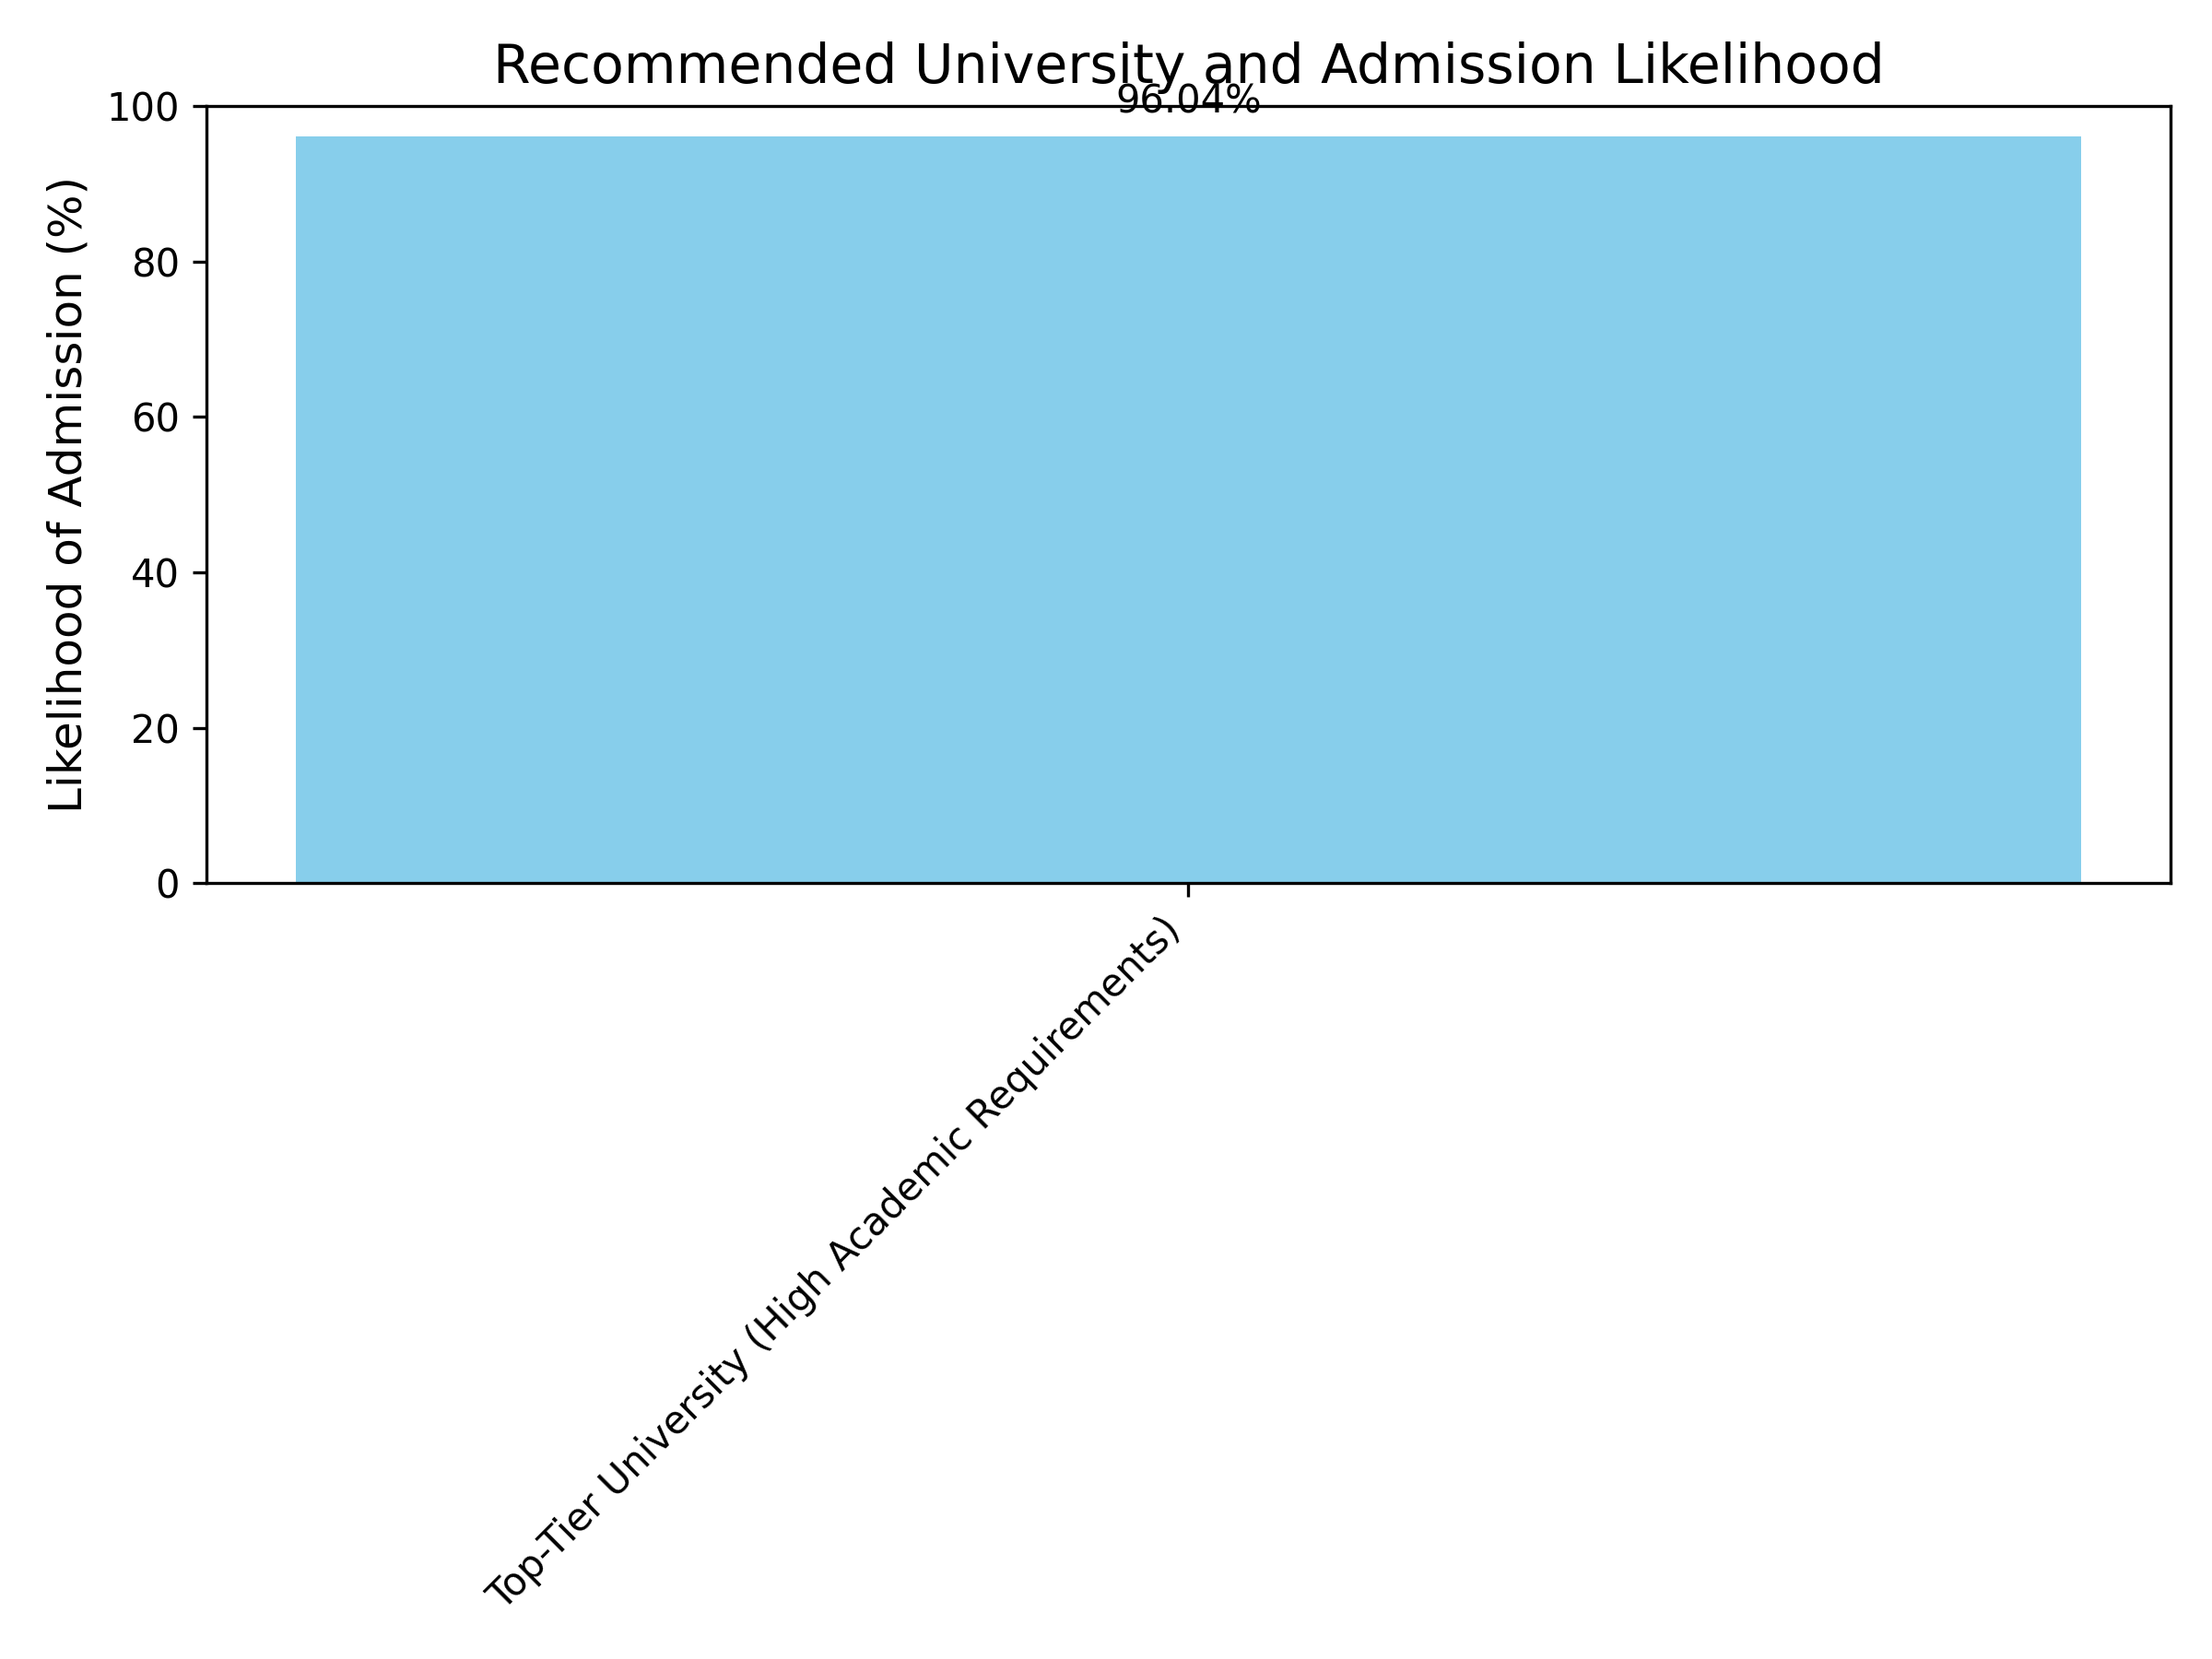

In [ ]:
print("Recommendation Visualization:")
display(Image(filename='recommendation_plot.png'))